## Accessing Sentinel-2 L2A data with the Planetary Computer STAC API

The [Planetary Computer Hub](https://planetarycomputer.microsoft.com/compute) is pre-configured to use your API key.


In [1]:
### Environment setup
import sys
sys.path.append('/content')
from src.fluvius import WaterData, WaterStation
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import geopandas as gpd
import fsspec
from pystac_client import Client
import planetary_computer as pc
import os

import matplotlib.pyplot as plt
# Set the environment variable PC_SDK_SUBSCRIPTION_KEY, or set it here.
# The Hub sets PC_SDK_SUBSCRIPTION_KEY automatically.
# pc.settings.set_subscription_key(<YOUR API Key>)
env_vars = !cat /content/.env

for var in env_vars:
    key, value = var.split(' = ')
    os.environ[key] = value

#################  set up ####################
data_source = 'itv'
container = f'{data_source}-data'
############## initial parameters ##############
if data_source == 'usgs':
    day_tolerance = 0 #reduce this for usgs-data
else:
    day_tolerance = 8 
cloud_thr = 80
buffer_distance = 500 # change this to increase chip size in meter 
################################################

storage_options={'account_name':os.environ['ACCOUNT_NAME'],\
                 'account_key':os.environ['BLOB_KEY'],
                 'connection_string': os.environ['CONNECTION_STRING']}

fs = fsspec.filesystem('az',\
                       account_name=storage_options['account_name'],\
                       account_key=storage_options['account_key'])   


In [2]:
ds = WaterData(data_source, container, storage_options)
ds.get_source_df()
ds.apply_buffer_to_points(buffer_distance)
ds.generate_map()
ds.plot_map

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [49]:
#full loop
for station in ds.df['site_no']:
    ds.get_station_data(station)
    ds.station[station].build_catalog()
    if ds.station[station].catalog is None:
        print('No matching images! Skipping...')
        continue
    else:
        ds.station[station].get_cloud_filtered_image_df(cloud_thr)
        ds.station[station].merge_image_df_with_samples(day_tolerance)
        ds.station[station].perform_chip_cloud_analysis()
        ds.station[station].get_reflectances()
        sstation = str(station).zfill(8)
        outfilename = f'az://{ds.container}/stations/{sstation}/{sstation}_processed.csv'
        ds.station[station].merged_df.to_csv(outfilename,index=False,storage_options=ds.storage_options)
        print(f'wrote csv {outfilename}')
        print('writing chips!')
        ds.station[station].write_tiles_to_blob(working_dirc='/tmp')


building catalog for station ITV1 with sentinel-2-l2a!
471 Items found
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2018/10/01/S2B_MSIL2A_20181001T135109_N0212_R024_T22MEE_20201009T070506.SAFE/GRANULE/L2A_T22MEE_A008201_20181001T135107/IMG_DATA/R20m/T22MEE_20181001T135109_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/01/24/S2A_MSIL2A_20190124T135111_N0212_R024_T22MEE_20201008T041303.SAFE/GRANULE/L2A_T22MEE_A018754_20190124T135109/IMG_DATA/R20m/T22MEE_20190124T135111_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2018/10/01/S2B_MSIL2A_20181001T135109_N0212_R024_T22MEE_20201009T070506.SAFE/GRANULE/L2A_T22MEE_A008201_20181001T135107/IMG_DATA/R10m/T22MEE_20181001T135109_TCI_10m.tif returned 404 response!
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/01/24/S2A_MSIL2A_20190124T135111_N0212_R024_T22MEE_20201008T041303.SAFE/GRANULE/L2A_T22MEE_A018754_20190124T13

https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/09/06/S2B_MSIL2A_20190906T135119_N0212_R024_T22MEE_20201004T100744.SAFE/GRANULE/L2A_T22MEE_A013063_20190906T135114/IMG_DATA/R10m/T22MEE_20190906T135119_TCI_10m.tif returned 404 response!
wrote csv az://itv-data/stations/0000ITV4/0000ITV4_processed.csv
writing chips!
building catalog for station ITV5 with sentinel-2-l2a!
162 Items found
wrote csv az://itv-data/stations/0000ITV5/0000ITV5_processed.csv
writing chips!
building catalog for station ITV6 with sentinel-2-l2a!
161 Items found
wrote csv az://itv-data/stations/0000ITV6/0000ITV6_processed.csv
writing chips!
building catalog for station ITV7 with sentinel-2-l2a!
317 Items found
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/FE/2018/03/02/S2B_MSIL2A_20180302T134159_N0212_R124_T22MFE_20201013T054254.SAFE/GRANULE/L2A_T22MFE_A005155_20180302T134201/IMG_DATA/R20m/T22MFE_20180302T134159_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net

https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/FE/2019/09/13/S2B_MSIL2A_20190913T134209_N0212_R124_T22MFE_20201004T124933.SAFE/GRANULE/L2A_T22MFE_A013163_20190913T134211/IMG_DATA/R10m/T22MFE_20190913T134209_TCI_10m.tif returned 404 response!
wrote csv az://itv-data/stations/0000ITV9/0000ITV9_processed.csv
writing chips!
building catalog for station ITV10 with sentinel-2-l2a!
321 Items found
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2017/04/04/S2A_MSIL2A_20170404T135111_N0212_R024_T22MEE_20210209T044300.SAFE/GRANULE/L2A_T22MEE_A009316_20170404T135109/IMG_DATA/R20m/T22MEE_20170404T135111_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2018/04/19/S2A_MSIL2A_20180419T135111_N0212_R024_T22MEE_20201013T000005.SAFE/GRANULE/L2A_T22MEE_A014750_20180419T135113/IMG_DATA/R20m/T22MEE_20180419T135111_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2018/10/01/S2B_MSIL2A_20181001T135

building catalog for station ITV13 with sentinel-2-l2a!
161 Items found
wrote csv az://itv-data/stations/000ITV13/000ITV13_processed.csv
writing chips!
building catalog for station ITV14 with sentinel-2-l2a!
162 Items found
wrote csv az://itv-data/stations/000ITV14/000ITV14_processed.csv
writing chips!
building catalog for station ITV15 with sentinel-2-l2a!
477 Items found
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/FE/2018/04/21/S2B_MSIL2A_20180421T134209_N0212_R124_T22MFE_20201013T010200.SAFE/GRANULE/L2A_T22MFE_A005870_20180421T134209/IMG_DATA/R20m/T22MFE_20180421T134209_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/FE/2018/06/30/S2B_MSIL2A_20180630T134209_N0212_R124_T22MFE_20201012T042210.SAFE/GRANULE/L2A_T22MFE_A006871_20180630T134209/IMG_DATA/R20m/T22MFE_20180630T134209_SCL_20m.tif 404 error
https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/FE/2019/04/11/S2A_MSIL2A_20190411T134211_N0212_R124_T22MFE_20201007T004

In [5]:
station = 'ITV4' 
ds.get_station_data(station)

In [10]:
ds.station[station].build_catalog()

building catalog for station ITV4 with sentinel-2-l2a!
483 Items found


In [12]:
c = ds.station[station].catalog

In [29]:
out = [i for i in c.items()]

In [37]:
out[2].ext.eo.cloud_cover

0.05206

In [27]:
out.assets

{'safe-manifest': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/08/27/S2B_MSIL2A_20190827T135119_N0212_R024_T22MEE_20201106T053643.SAFE/manifest.safe>,
 'product-metadata': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/08/27/S2B_MSIL2A_20190827T135119_N0212_R024_T22MEE_20201106T053643.SAFE/MTD_MSIL2A.xml>,
 'granule-metadata': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/08/27/S2B_MSIL2A_20190827T135119_N0212_R024_T22MEE_20201106T053643.SAFE/GRANULE/L2A_T22MEE_A012920_20190827T135116/MTD_TL.xml>,
 'inspire-metadata': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/08/27/S2B_MSIL2A_20190827T135119_N0212_R024_T22MEE_20201106T053643.SAFE/INSPIRE.xml>,
 'datastrip-metadata': <Asset href=https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/22/M/EE/2019/08/27/S2B_MSIL2A_20190827T135119_N0212_R024_T22MEE_20201106T053643.SAFE/DATASTRIP/DS_ESRI_

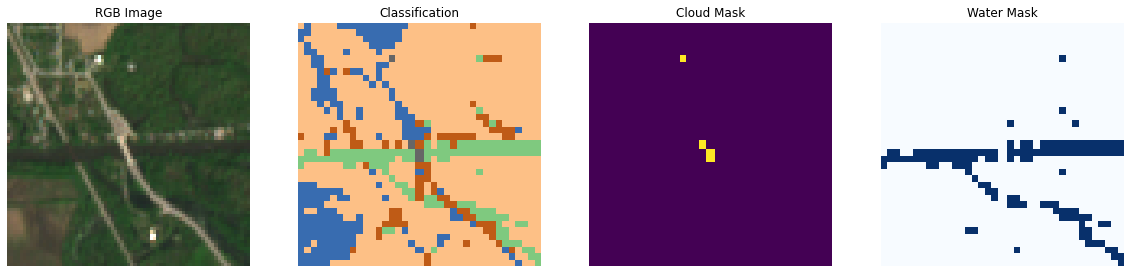

In [13]:
sample_id = ds.station[station].merged_df.sample_id.iloc[1]
ds.station[station].visualize_chip(sample_id)

In [109]:
np.mean(np.array(img)[water_mask],axis=0)

array([58.03409091, 57.53787879, 36.66287879])

In [26]:
station = ds.df.iloc[4].site_no
ds.get_station_data(station)
ds.station[station].build_catalog()
ds.station[station].get_cloud_filtered_image_df(cloud_thr)
ds.station[station].merge_image_df_with_samples(day_tolerance)
ds.station[station].perform_chip_cloud_analysis()
ds.station[station].get_reflectances()

building catalog for station 01646305 with sentinel-2-l2a!
162 Items found


<AxesSubplot:>

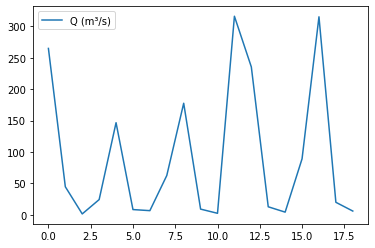

In [12]:
import matplotlib.pyplot as plt
ds.station[station].df[['Date-Time','Q (m³/s)']].plot()

In [46]:
g = fs.ls('itv-data/stations')
#a = [f for f in g if any(map(str.isdigit, f))]
a = [f for f in g if 'csv' in f]
#out = [f"{o.split('/')[0]}/raw/{o.split('/')[-1]}" for o in a]
out = [f"{o.split('/')[0]}/stations/{str(o.split('/')[-1][:-4]).zfill(8)}.csv" for o in a]

for i,o in zip(a,out):
    #print(i,o)
    fs.mv(i,o)

In [44]:
out

['itv-data/0000ITV1.csv',
 'itv-data/000ITV10.csv',
 'itv-data/000ITV11.csv',
 'itv-data/000ITV12.csv',
 'itv-data/000ITV13.csv',
 'itv-data/000ITV14.csv',
 'itv-data/000ITV15.csv',
 'itv-data/000ITV16.csv',
 'itv-data/0000ITV2.csv',
 'itv-data/0000ITV3.csv',
 'itv-data/0000ITV4.csv',
 'itv-data/0000ITV5.csv',
 'itv-data/0000ITV6.csv',
 'itv-data/0000ITV7.csv',
 'itv-data/0000ITV8.csv',
 'itv-data/0000ITV9.csv']